## Cleaning and preparing the data for model training

link to dataset: https://www.kaggle.com/datasets/sdolezel/black-friday

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [52]:
# importing the dataset

df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [53]:
# import the test data

df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [54]:
# merge both train and test data

df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [56]:
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [57]:
# Handling categorical feature Gender

df['Gender']=df['Gender'].map({'F':0,'M':1})
df['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
783662    0
783663    0
783664    0
783665    0
783666    0
Name: Gender, Length: 783667, dtype: int64

In [58]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [59]:
# Handle categorical feature Age 

#pd.get_dummies(df['Age'],drop_first=True)

In [60]:
df['Age']=df['Age'].map({'0-17':1,'55+':2,'26-35':3,'46-50':4,'51-55':5,'36-45':6,'18-25':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969.0


In [61]:
## Second Technique Label Encoder
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Age']=label_encoder.fit_transform(df['Age'])
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,1,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,2,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,0,2,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,0,2,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,3,1,C,4+,0,10,16.0,NaN,NaN


In [62]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [63]:
# Handling categorical feature City_Category

df_1= pd.get_dummies(df['City_Category'], dtype='int', drop_first=True)


In [ ]:
# Handling using OneHotEncoder

from sklearn import preprocessing
one_hot_encoder=preprocessing.OneHotEncoder()
df['City_Category']



In [64]:
df=pd.concat([df,df_1],axis=1)

In [66]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,1,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,2,15,B,4+,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,2,15,B,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,2,15,B,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,3,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [67]:
df=df.drop(['City_Category'],axis=1)
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,1,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,2,15,4+,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,3,1,4+,0,10,16.0,NaN,NaN,0,1


In [69]:
## replace missing values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [70]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [73]:
# replacing nan values in Product_Category_2 with its mode 

df['Product_Category_2'].mode()[0]
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2']

0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
783662     8.0
783663     8.0
783664     5.0
783665    16.0
783666     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [74]:
df['Product_Category_2'].isnull().sum()

0

In [75]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [76]:
# replacing nan values in Product_Category_3 with its mode 

df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [77]:
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [78]:
# replacing nan values in Purchase with its mean

df['Purchase']=df['Purchase'].fillna(df['Purchase'].mean())
df['Purchase'].isnull().sum()

0

In [79]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.000000,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.000000,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.000000,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.000000,0,0
4,P00285442,1,1,16,4+,0,8,8.0,16.0,7969.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,2,15,4+,1,8,8.0,16.0,9263.968713,1,0
783663,P00254642,0,2,15,4+,1,5,8.0,16.0,9263.968713,1,0
783664,P00031842,0,2,15,4+,1,1,5.0,12.0,9263.968713,1,0
783665,P00124742,0,3,1,4+,0,10,16.0,16.0,9263.968713,0,1


In [80]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [81]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
783662    4
783663    4
783664    4
783665    4
783666    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [82]:
## Converting obj to int type

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


In [84]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

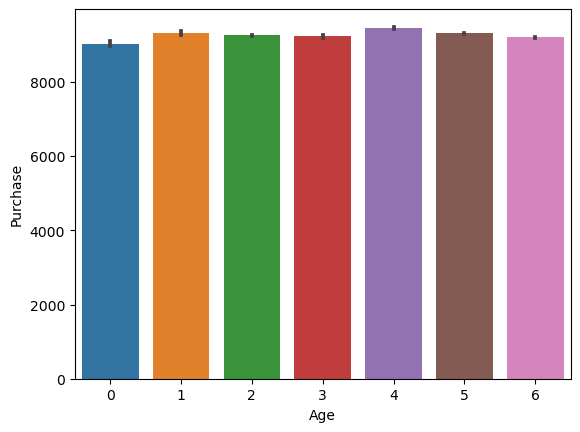

In [88]:
## Visualization
sns.barplot(x='Age',y='Purchase',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

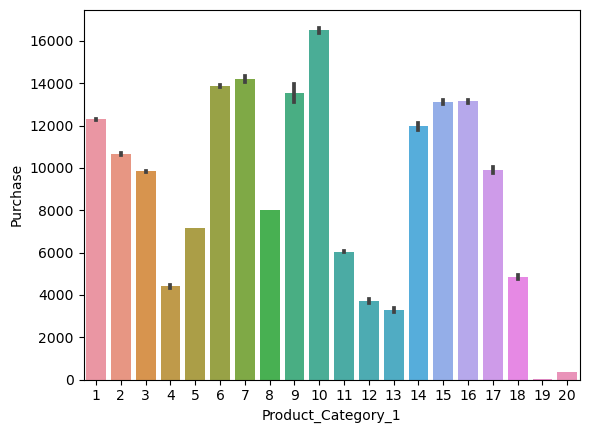

In [89]:
sns.barplot(x='Product_Category_1',y='Purchase',data=df)

## Feature Scaling



In [94]:
from sklearn.model_selection import train_test_split

x=df.drop(['Purchase','Product_ID'],axis=1)
y=df['Purchase']

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=20)


In [97]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)